In [1]:
try:
    from matplotlib import pyplot as plt
    import sys,os
    from dataclasses import dataclass
    print("Imports completed")
except Error as e:
    print("Error while importing package.")
    print(e)

print("Working in directory: ",os.getcwd())

Imports completed
Working in directory:  /Users/lorenzoconti/Desktop/Tesi/Tomasi/projects/litebird/inclination_package/LiteBIRD-inclination-analysis/notebooks


# <span style="color:orange"> Influence of various parameters on FWHM Error </span>

This report seeks to study how different parameters can influence the values of the error of a planet's FWHM, in order to decide whether abnormal values for the FWHM error are explainable or not. The parameters in consideration are:

- **Observation time of the planet as a function of the angular radius**. The FWHM error strongly depends on this parameter, because a longer observation time for a planet makes the measurements of a variable more accurate.
- **Brightness temperature of the planet**. A brighter planet tends to minimize the error for an observable because the amount of captured radiation for such planet is significantly higher.
- **Size of the planet**

##  <span style="color:green"> Radius vs Time analysis </span>

The following script aims to analyze the difference in the time spent observing the planet as a function of the angular radius relative to the beam axis. An example can be seen from the following hitmap for Jupiter:

<img src="hitmaps/jupiter.png" alt="Jupiter Hitmap" style="width:600px;"/>

The goal for this sectiono is to observe whether the time spent observing a planet has an impact on the measurements of the FWHM and its error. If the duration graphs for different planets are different, it can be hypothesised that it might influence such measurements, otherwise there is no chance for such hypothesis.



### Code summary

I will provide at least one graph for each parameter in order to visualize its impact on the considered observable.

The data is fetched from a report generated by [LiteBIRD's Python framework](https://github.com/litebird/litebird_sim) during a simulation. The graphs are plotted using Matplotlib's pyplot package.

A dataclass representing the information for a planet was created in order to keep the code clean and avoid unnecessary nested lists and other complex data types.

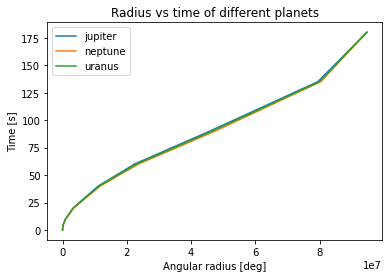

In [2]:
@dataclass
class PlanetData:
    name : str
    rad : list[float]
    time : list[float]
    radius_m: float = None
    temperature_k: float = None

PLANETS = ["jupiter","neptune","uranus"]
plt.title("Radius vs time of different planets")
plt.xlabel("Angular radius [deg]")
plt.ylabel("Time [s]")
data = []

for p in PLANETS:
    filename = f"../results/radius_vs_time/data/{p}.txt"
    lines = open(filename,"r+").read().split("\n")
    rad = []
    time = []
    for i in lines[:-1]:
        elems = i.split(" ")
        elems = [float(x) for x in elems]
        time.append(elems[0])
        rad.append(elems[1])
    pl_data = PlanetData(name=p,rad=rad,time=time)
    data.append(pl_data)
    
    
    plt.plot(pl_data.rad,pl_data.time,label=p)
    
plt.legend()
plt.show()

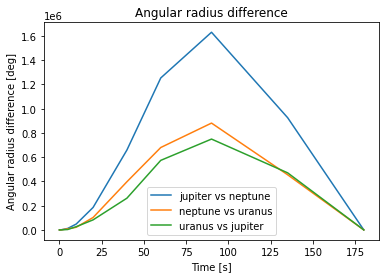

In [3]:
size = 12

for x in data:
    assert size <= len(x.rad) and size <= len(x.time),f"Size must be lower or equal than {len(x.rad)}"
for index1 in range(3):  
    planet1 = index1%3
    planet2 = ((index1+1)%3)
    y = []
    plt.title(f"Angular radius difference")
    plt.xlabel("Time [s]")
    plt.ylabel("Angular radius difference [deg]")
    for index2 in range(size):
        y.append(abs(data[planet1].rad[index2]-data[planet2].rad[index2]))
    plt.plot(data[planet1].time[:size],y,label=f"{data[planet1].name} vs {data[planet2].name}")
plt.legend()
plt.show()

### Results for angular radius time-series
The first figure shows that the time spent observing each planet is very similar. In fact, they are so alike that I chose to plot the difference in the angular radius at a given value of time for each planet. It is worth noticing that the difference peaks halfway the timeseries for all planetary combinations, but it is still negligible in terms of intensity. This result demonstrates that this parameter does not influence the FWHM error.

## <span style="color:green">Brightness temperature & Planet dimensions </span>

As for the time of observation for a planet, if the graphs for planet temperature and planet radius are very similar, it can be supposed that the considered parameter does not influence the error of the FWHM. 

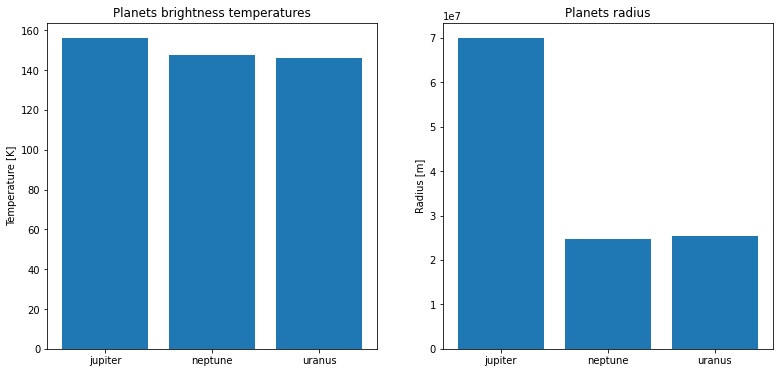

In [4]:
# Fill temperature & radius data
for d in data:
    if d.name == "jupiter":
        d.temperature_k = 156.0
        d.radius_m = 6.9911e+7
    elif d.name == "neptune":
        d.temperature_k = 147.3
        d.radius_m = 2.4622e+7
    elif d.name == "uranus":
        d.temperature_k = 146.1
        d.radius_m = 2.5362e+7
    else:
        raise ValueError(f"Invalid planet name {d.name}")

fig,ax = plt.subplots(1,2,figsize=(13,6))

temps, rads, ticks = zip(*[(d.temperature_k, d.radius_m, d.name) for d in data])
ax[0].set_title("Planets brightness temperatures")
ax[0].set_ylabel("Temperature [K]")
ax[0].bar(ticks,height=temps)

ax[1].set_title("Planets radius")
ax[1].set_ylabel("Radius [m]")
ax[1].bar(ticks,height=rads)

plt.show()

### Results
The temperatures are very similar for every planet, therefore it can be said that its influence of the FWHM error is negligible. On the other hand, Jupiter is much larger than other planets. The size of the planet can impact an observation because it of how difficult it is to be observed. In fact, a larger planet should carry lower error values than a smaller planet